In [1]:
pip install tensorflow numpy matplotlib pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

In [4]:
dataset_dir = 'Plant_leave_diseases_dataset_without_augmentation'  

In [5]:
# ImageDataGenerator for loading images, rescaling, and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale image pixel values to the range [0, 1]
    rotation_range=40,  #rotation
    width_shift_range=0.2,  #horizontal shift
    height_shift_range=0.2,  #vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  #zoom
    horizontal_flip=True,  #horizontal flip
    fill_mode='nearest'  # Fill in new pixels after transformations
)

# Load images from directory and apply the transformations
train_generator = datagen.flow_from_directory(
    dataset_dir,  
    target_size=(224, 224),  # Resize images to 224x224 for VGG16
    batch_size=32,  # Number of images to process at once
    class_mode='categorical'  
)

print("Classes:", train_generator.class_indices)  

Found 55448 images belonging to 39 classes.
Classes: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9, 'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___Black_rot': 12, 'Grape___Esca_(Black_Measles)': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Grape___healthy': 15, 'Orange___Haunglongbing_(Citrus_greening)': 16, 'Peach___Bacterial_spot': 17, 'Peach___healthy': 18, 'Pepper,_bell___Bacterial_spot': 19, 'Pepper,_bell___healthy': 20, 'Potato___Early_blight': 21, 'Potato___Late_blight': 22, 'Potato___healthy': 23, 'Raspberry___healthy': 24, 'Soybean___healthy': 25, 'Squash___Powdery_mildew': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_b

In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model to retain learned features
for layer in base_model.layers:
    layer.trainable = False

# Create a new model with the pre-trained VGG16 base and custom classification layers
model = models.Sequential([
    base_model,  
    layers.Flatten(),  # Flatten the output of the VGG16 
    layers.Dense(256, activation='relu'),  # Fully connected layer for classification
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary 
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │        10,023 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,147,495 (80.67 MB)

 Trainable params: 6,432,807 (24.54 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
# Train the model
history = model.fit(
    train_generator,  
    steps_per_epoch=train_generator.samples // 32,  # Number of batches per epoch
    epochs=10  
)


C:\Users\aruno\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 3889s 2s/step - accuracy: 0.2952 - loss: 2.6010
Epoch 2/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 2s 11us/step - accuracy: 0.3750 - loss: 1.8207   
Epoch 3/10


C:\Users\aruno\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1732/1732 ━━━━━━━━━━━━━━━━━━━━ 3889s 2s/step - accuracy: 0.4174 - loss: 1.8772
Epoch 4/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 2s 9us/step - accuracy: 0.3438 - loss: 2.0257    
Epoch 5/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 3899s 2s/step - accuracy: 0.4440 - loss: 1.7712
Epoch 6/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 2s 10us/step - accuracy: 0.4375 - loss: 2.0520   
Epoch 7/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 3926s 2s/step - accuracy: 0.4564 - loss: 1.7205
Epoch 8/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 2s 10us/step - accuracy: 0.5312 - loss: 1.7382   
Epoch 9/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 3887s 2s/step - accuracy: 0.4623 - loss: 1.7052
Epoch 10/10
1732/1732 ━━━━━━━━━━━━━━━━━━━━ 2s 10us/step - accuracy: 0.5312 - loss: 1.5896   


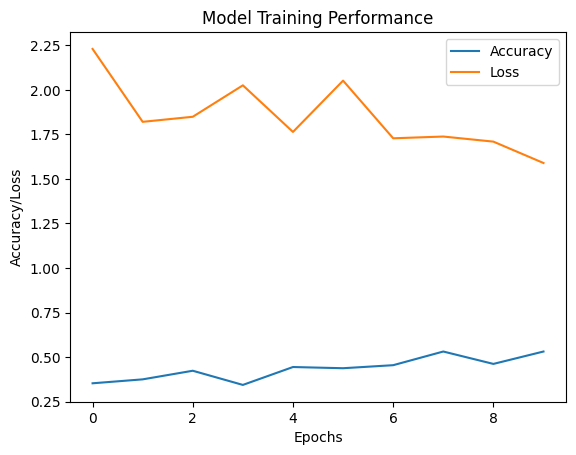

In [8]:
import matplotlib.pyplot as plt

# Plot the training accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [9]:
# Save the trained model to a file
model.save('plant_disease_model.h5')  # You can choose any name you like
